<a href="https://colab.research.google.com/github/farisahmed123/Student-Data-Base-Program/blob/main/FARIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"farisnizamani","key":"bd7862a0124c866a1701ca9d018df3ca"}'}

In [1]:
!mkdir -p ~/.kaggle

In [4]:
!cp kaggle.json ~/.kaggle/

In [5]:
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d anthonytherrien/dog-vs-cat



Dataset URL: https://www.kaggle.com/datasets/anthonytherrien/dog-vs-cat
License(s): CC-BY-SA-4.0


In [7]:
!unzip dog-vs-cat.zip -d dog-vs-cat


Archive:  dog-vs-cat.zip
  inflating: dog-vs-cat/animals/cat/00000-4122619873.png  
  inflating: dog-vs-cat/animals/cat/00001-4122619874.png  
  inflating: dog-vs-cat/animals/cat/00002-4122619875.png  
  inflating: dog-vs-cat/animals/cat/00003-4122619876.png  
  inflating: dog-vs-cat/animals/cat/00004-4122619877.png  
  inflating: dog-vs-cat/animals/cat/00005-4122619878.png  
  inflating: dog-vs-cat/animals/cat/00006-4122619879.png  
  inflating: dog-vs-cat/animals/cat/00007-4122619880.png  
  inflating: dog-vs-cat/animals/cat/00008-4122619881.png  
  inflating: dog-vs-cat/animals/cat/00009-4122619882.png  
  inflating: dog-vs-cat/animals/cat/00010-4122619883.png  
  inflating: dog-vs-cat/animals/cat/00011-4122619884.png  
  inflating: dog-vs-cat/animals/cat/00012-4122619885.png  
  inflating: dog-vs-cat/animals/cat/00013-4122619886.png  
  inflating: dog-vs-cat/animals/cat/00014-4122619887.png  
  inflating: dog-vs-cat/animals/cat/00015-4122619888.png  
  inflating: dog-vs-cat/animals

In [69]:
import os
import pandas as pd

# Path to dataset folder
dataset_path = r'dog-vs-cat\animals'

# Label mapping
label_map = {'cat': 0, 'dog': 1}

# Lists to collect data
file_paths = []
labels = []

# Loop through both folders
for label_name in ['cat', 'dog']:
    folder_path = os.path.join(dataset_path, label_name)
    for filename in os.listdir(folder_path):
        if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
            full_path = os.path.join(folder_path, filename)
            file_paths.append(full_path)
            labels.append(label_map[label_name])

# Create labeled DataFrame
df = pd.DataFrame({
    'file_path': file_paths,
    'label': labels
})

# Shuffle the dataset (optional but recommended)
df = df.sample(frac=1).reset_index(drop=True)

# Show the first few rows
print(df.head())


FileNotFoundError: [Errno 2] No such file or directory: 'dog-vs-cat\\animals/cat'

In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.metrics import Accuracy
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [9]:
from tensorflow.keras.utils import image_dataset_from_directory

dataset = image_dataset_from_directory(
    directory='/content/dog-vs-cat/animals',
    labels='inferred',
    label_mode='binary',  # 'int' also works
    image_size=(256, 256),  # Resize all images to a consistent size
    batch_size=32
)


Found 1000 files belonging to 2 classes.


In [10]:
train_ds = image_dataset_from_directory(
    directory='/content/dog-vs-cat/animals',  # Path to dataset
    labels='inferred',  # Automatically infer labels (dog and cat)
    label_mode='binary',  # Binary classification (dog vs cat)
    image_size=(256, 256),  # Resize images to 180x180
    batch_size=32  # Number of images per batch
)
val_ds = image_dataset_from_directory(
    directory='/content/dog-vs-cat/animals',  # Path to dataset
    labels='inferred',  # Automatically infer labels (dog and cat)
    label_mode='binary',  # Binary classification (dog vs cat)
    image_size=(256, 256),  # Resize images to 180x180
    batch_size=32  # Number of images per batch
)


Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [76]:
def process(image,label):
    image = tf.cast(image/255.,tf.float32)
    return image,label
train_ds = train_ds.map(process)
val_ds = val_ds.map(process)
# Manually fix labels if needed by swapping
train_ds = train_ds.map(lambda x, y: (x, tf.where(y == 0, 1, 0)))  # Swap 0 and 1
val_ds = val_ds.map(lambda x, y: (x, tf.where(y == 0, 1, 0)))  # Swap 0 and 1


In [12]:
model = Sequential([
    Conv2D(64,(3,3),activation='relu',input_shape=(256,256,3)),
    MaxPooling2D((2,2)),

    Conv2D(128,(3,3),activation='relu',input_shape=(256,256,3)),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128,activation='relu'),
    Dense(64,activation='relu'),
    Dense(1,activation='sigmoid')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']  # corrected spelling
)
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 492032)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    62,980,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 63,064,193 (240.57 MB)

 Trainable params: 63,064,193 (240.57 MB)

 Non-trainable params: 0 (0.00 B)

In [82]:
history = model.fit(
    train_ds,
    validation_data=val_ds,  # Corrected from 'validation' to 'validation_data'
    epochs=20
)


Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 18s 427ms/step - accuracy: 0.4714 - loss: 2.0573 - val_accuracy: 0.5000 - val_loss: 0.6994
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 419ms/step - accuracy: 0.5131 - loss: 0.6928 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 23s 502ms/step - accuracy: 0.4993 - loss: 0.6934 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 418ms/step - accuracy: 0.5172 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 420ms/step - accuracy: 0.4912 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 25s 558ms/step - accuracy: 0.4814 - loss: 0.6933 - val_accuracy: 0.5050 - val_loss: 0.6932
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 417ms/step - accuracy: 0.4831 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 417ms/step - accuracy: 0.4909 - loss: 0.6933 - val_accu

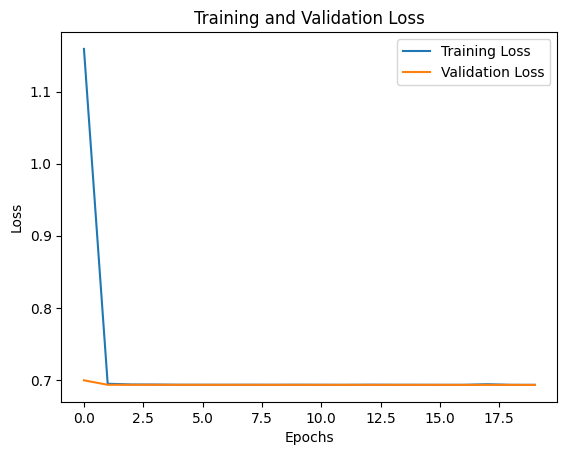

In [83]:
import matplotlib.pyplot as plt

# Extract loss values from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Create a plot for training and validation loss
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')

# Add labels and title
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show the plot
plt.show()


In [80]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load image and resize to match training input
img = image.load_img("aa.jpg", target_size=(256, 256))
img_array = image.img_to_array(img)

# Normalize if your model was trained on normalized data
img_array = img_array / 255.0

# Add batch dimension
img_array = np.expand_dims(img_array, axis=0)



In [81]:
prediction = model.predict(img_array)

# Since this is binary classification, prediction is a value between 0 and 1
print("Prediction value:", prediction[0][0])

# Convert to class label
if prediction[0][0] >= 0.5:
    print("Predicted: Dog 🐶")
else:
    print("Predicted: Cat 🐱")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Prediction value: 0.6764606
Predicted: Dog 🐶


In [54]:
os.path.exists(r"C:\Users\Faris Ahmed\Downloads\aa.jpg")


False

In [72]:
from google.colab import files
uploaded = files.upload()


Saving ccc.jpg to ccc.jpg


In [56]:
import os
print("Exists?", os.path.exists("aa.jpg"))


Exists? True
